# Figure 3

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os
from tqdm import tqdm
import imageio
import cv2
import scipy
from itertools import product

sys.path.append("./utils")
# import myUtils as utils
from caAnalysisUtils import RunSimulation, PlotSimulation_CA, GenerateATComparisonPlot_CA, GenerateATComparisonPlot_ODE, PlotCompetitionOverTime


# Format plots
sns.set(style="white",
        font_scale=2.,
        font="Serif",
        rc={'figure.figsize':(12,6)})

In [83]:
### Script parameters
colorDic = {'MTD':'#FF9409','AT50':'#094486'}
runCASimulations = True # Whether to run the CA simulations to generate the data analysed in this script

## a) & b) Example Simulations

In [84]:
# Params for the figure
initialSize = 0.5
rFracList = [0.1,0.01]
turnoverList = [0,0.3]
costList = [0,0.3]
nReplicates = 250
tEnd = 1.5e3
seedToShowImagesFor = 0
dataDir = "./data/exampleSims_withCost_withTurnover/data/"
imgDir = "./data/exampleSims_withCost_withTurnover/images/"

### Collect Data

In [19]:
# Collect the data for the time series plots showing the treatment dynamics avaraged across nReplicate simulations
if runCASimulations:
    for rFrac, cost, turnover, in tqdm(product(rFracList, costList, turnoverList)):
        currOutDir = os.path.join(dataDir,"turnover%1.2f/cost%1.2f/"%(turnover,cost))
        modelConfigDic = {"initialSize":initialSize,"rFrac":rFrac,"turnover":turnover,"cost":cost,
                          "tEnd":tEnd,"nReplicates":nReplicates,
                          "profilingMode":"false","terminateAtProgression":"false",
                          "outDir":currOutDir}
        RunSimulation(modelConfigDic,jarFileName='./onLatticeModel.jar')

8it [32:23, 242.98s/it]


In [24]:
# Collect the images for one replicate
rFrac = 0.01
if runCASimulations:
    for cost, turnover, in tqdm(product(costList, turnoverList)):
        currOutDir = os.path.join(imgDir,"turnover%1.2f/cost%1.2f/"%(turnover,cost))
        modelConfigDic = {"initialSize":initialSize,"rFrac":rFrac,"turnover":turnover,"cost":cost,
                          "tEnd":tEnd,"seed":seedToShowImagesFor,"nReplicates":1,
                          "profilingMode":"false","terminateAtProgression":"true",
                          "imageOutDir":currOutDir,"imageFreq":10,
                          "outDir":"./data/scratch/"}
        RunSimulation(modelConfigDic)

4it [00:15,  3.91s/it]


### a) Plot line plots

#### fR = 10\%

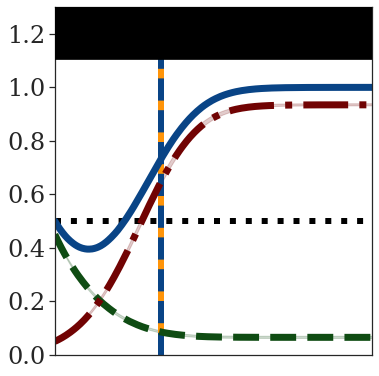

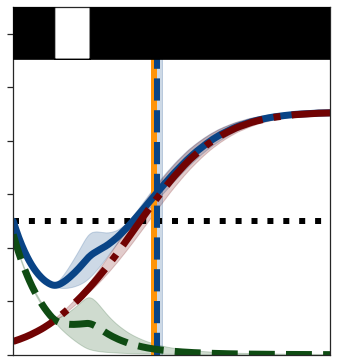

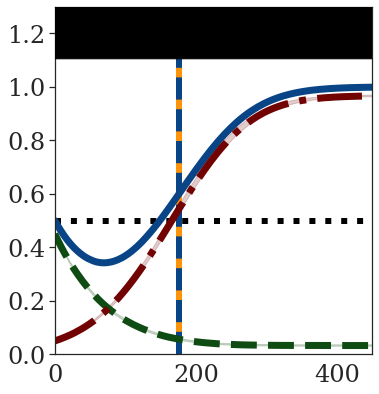

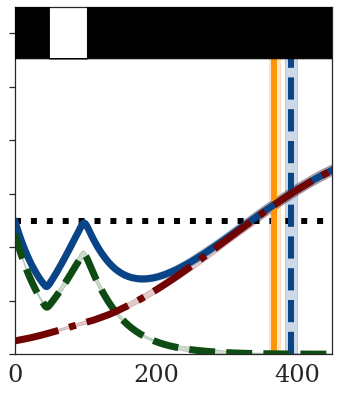

In [62]:
rFrac = 0.1
for cost, turnover, in product(costList, turnoverList):
    currOutDir = os.path.join(dataDir,"turnover%1.2f/cost%1.2f"%(turnover,cost))
    # Read the data
    tmpList = []
    for replicateId in range(nReplicates): #nReplicates
        for txName in ["MTD","AT50"]:
            currDfName = os.path.join(currOutDir,"%s_cellCounts_cost_%1.1f_rFrac_%.2g_initSize_%.2g_dt_1.0_RepId_%d.csv"%(txName,cost*100,rFrac,initialSize,replicateId))
            tmpDf = pd.read_csv(currDfName)
            tmpDf['NCells'] /= 1e4
            tmpDf['NCells_S'] /= 1e4
            tmpDf['NCells_R'] /= 1e4
            tmpDf['TreatmentBranch'] = txName
            tmpDf['ReplicateId'] = replicateId
            tmpList.append(tmpDf)
    dataDf = pd.concat(tmpList)
    dataDf.rename(columns={"NCells":"V","NCells_S":"S","NCells_R":"R"},inplace=True)
#     dataDf.to_csv("./data/fig3a_left_turnover%1.2f_cost%1.2f.csv"%(turnover,cost))
    # Plot
    GenerateATComparisonPlot_CA(dataDf,minTime=150,t_end=450,ylim=1.3,savefigB=True,
                                decoratex=cost==costList[1],decoratey=turnover==turnoverList[0],
                                outName="figures/exampleSim_rFrac%1.2f_turnover%1.2f_cost%1.2f.pdf"%(rFrac,turnover,cost),
                                figsize=(6,6))

#### fR = 1\%

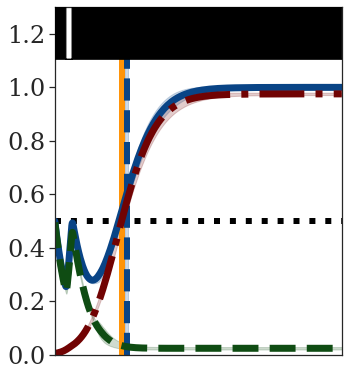

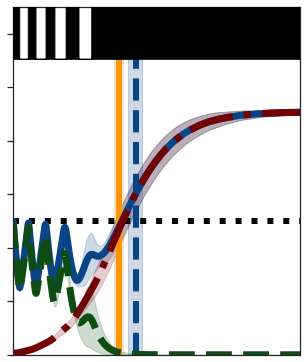

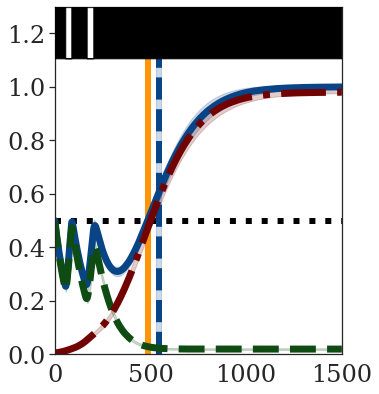

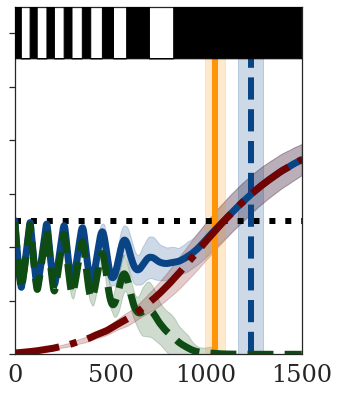

In [63]:
rFrac = 0.01
for cost, turnover, in product(costList, turnoverList):
    currOutDir = os.path.join(dataDir,"turnover%1.2f/cost%1.2f"%(turnover,cost))
    # Read the data
    tmpList = []
    for replicateId in range(nReplicates): #nReplicates
        for txName in ["MTD","AT50"]:
            currDfName = os.path.join(currOutDir,"%s_cellCounts_cost_%1.1f_rFrac_%.2g_initSize_%.2g_dt_1.0_RepId_%d.csv"%(txName,cost*100,rFrac,initialSize,replicateId))
            tmpDf = pd.read_csv(currDfName)
            tmpDf['NCells'] /= 1e4
            tmpDf['NCells_S'] /= 1e4
            tmpDf['NCells_R'] /= 1e4
            tmpDf['TreatmentBranch'] = txName
            tmpDf['ReplicateId'] = replicateId
            tmpList.append(tmpDf)
    dataDf = pd.concat(tmpList)
    dataDf.rename(columns={"NCells":"V","NCells_S":"S","NCells_R":"R"},inplace=True)
    dataDf.to_csv("./data/fig3a_right_turnover%1.2f_cost%1.2f.csv"%(turnover,cost))
    # Plot
    GenerateATComparisonPlot_CA(dataDf,minTime=150,t_end=1500,ylim=1.3,savefigB=True,
                                decoratex=cost==costList[1],decoratey=turnover==turnoverList[0],
                                outName="figures/exampleSim_rFrac%1.2f_turnover%1.2f_cost%1.2f.pdf"%(rFrac,turnover,cost),
                                figsize=(6,6))

### b) Example Images for seed 0

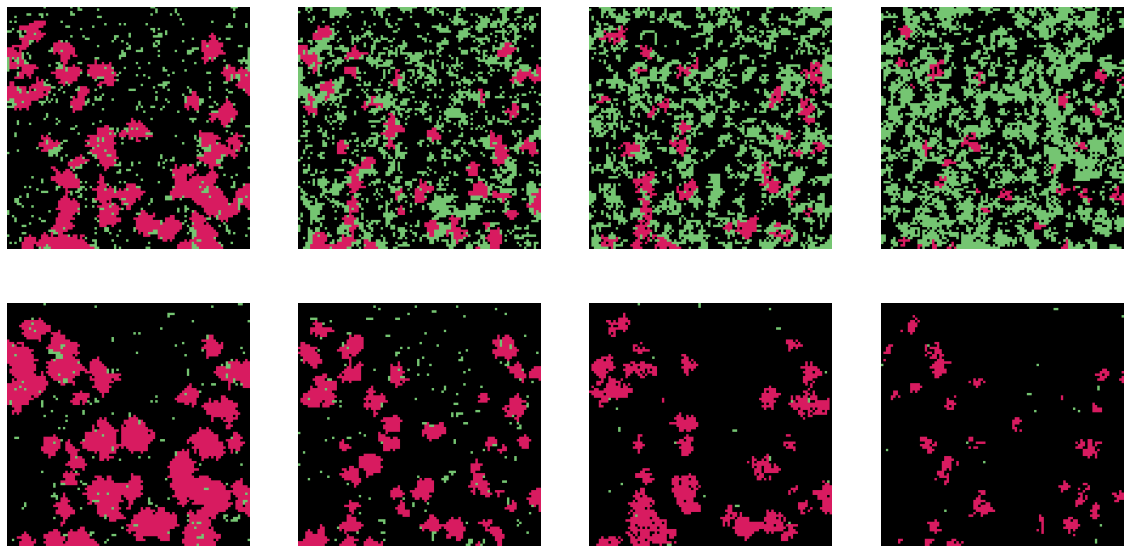

In [9]:
rFrac = 0.01
timePoint = 250

fig,axList = plt.subplots(2,4,figsize=(4*5,10))
for i,txName in enumerate(["AT50","MTD"]):
    for j, (turnover,cost) in enumerate(product(turnoverList,costList)):
        # Load image
        currOutDir = os.path.join(imgDir,"turnover%1.2f/cost%1.2f/"%(turnover,cost))
        currImgDir = os.path.join(currOutDir,"%s_cost_%1.1f_rFrac_%.2g_initSize_%.2g_dt_1.0_RepId_%d"%(txName,cost*100,rFrac,initialSize,seedToShowImagesFor))
        currImg = cv2.imread(os.path.join(currImgDir,"img_t_%.1f.png"%(float(timePoint))))
        currImg = cv2.cvtColor(currImg, cv2.COLOR_BGR2RGB)

        currAx = axList[i,j]
        currAx.imshow(currImg)
        currAx.axis('off')
#         currAx.set_title("t%1.2f_c%1.2f/"%(turnover,cost))
plt.savefig("figures/exampleSim_cost_turnover_images.pdf")

### GIFs

In [21]:
rFrac = 0.01

for txName in ["MTD","AT50"]:
    for (turnover,cost) in product(turnoverList,costList):
        # Make an inventory of the images that are available
        currOutDir = os.path.join(imgDir,"turnover%1.2f/cost%1.2f/"%(turnover,cost))
        currImgDir = os.path.join(currOutDir,"%s_cost_%1.1f_rFrac_%.2g_initSize_%.2g_dt_1.0_RepId_%d"%(txName,cost*100,rFrac,initialSize,seedToShowImagesFor))
        fNameList = [int(float(x.split("_")[-1].split(".png")[0])) for x in os.listdir(currImgDir) if x.split(".")[-1]=="png"]
        fNameList.sort()
        images = []
        for tId in fNameList[::2]:
            currImg = cv2.imread(os.path.join(currImgDir,"img_t_%.1f.png"%(float(tId))))
            currImg = cv2.cvtColor(currImg, cv2.COLOR_RGB2BGR)
            currImg = cv2.putText(currImg, 't = %dd'%tId, (10,190), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            # Add a square to indicate that drug is on
            currOutDir = os.path.join(dataDir,"turnover%1.2f/cost%1.2f"%(turnover,cost))
            currDfName = os.path.join(currOutDir,"%s_cellCounts_cost_%1.1f_rFrac_%.2g_initSize_%.2g_dt_1.0_RepId_%d.csv"%(txName,cost*100,rFrac,initialSize,seedToShowImagesFor))
            tmpDf = pd.read_csv(currDfName)
            if tmpDf[tmpDf.Time==tId].DrugConcentration.iloc[0]>0:
                cv2.rectangle(currImg, (175, 25), (197, 3), (255,255,255), -1)
            images.append(currImg)
        imageio.mimsave(os.path.join("gifs","%s_cost_%d_turnover_%d.gif"%(txName,cost*100,turnover*100)), images, duration=.1)

## c) Comparison of relative time gained

Note: data was collected using `collectData_costSweep.py`

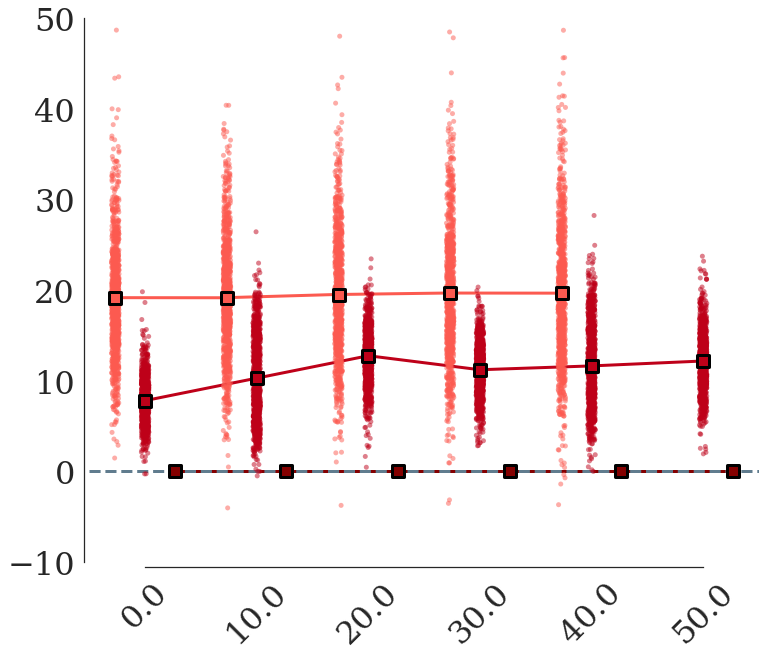

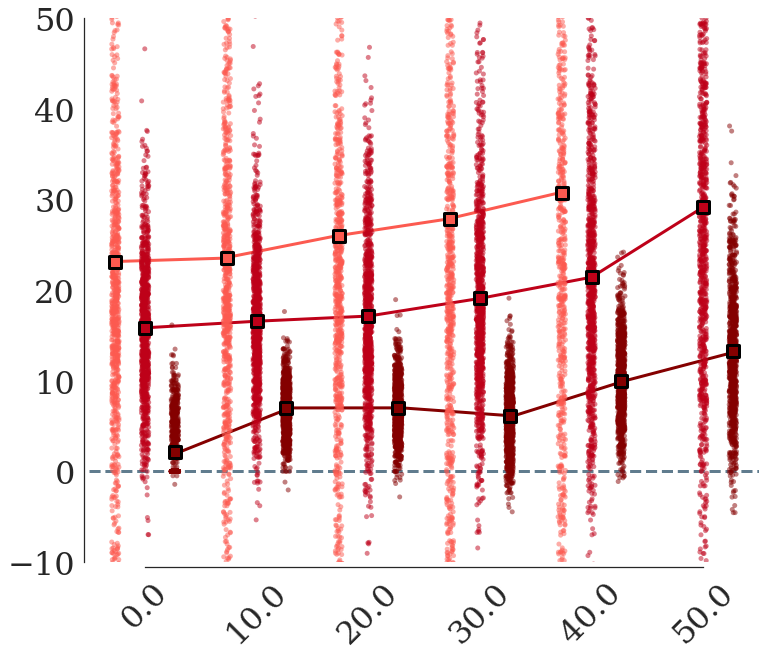

In [64]:
costSweepData = pd.read_csv("./data/costSweep.csv",index_col=0)
costSweepData['Cost'] *= 100
costSweepData.loc[(costSweepData.Cost==50) & (costSweepData.RFrac==0.001),'RelTimeGained_CA'] = np.nan

# Don't show results if more than 1/4 of simulations have not completed because they went beyond t_max=10y.
for rFrac,cost,turnover in product(costSweepData.RFrac.unique(),costSweepData.Cost.unique(),costSweepData.Turnover.unique()):
    currDataDf = costSweepData[(costSweepData.RFrac==rFrac) & (costSweepData.Turnover==turnover) & (costSweepData.Cost==cost)]
    if np.sum(np.isnan(currDataDf.TTP_AT50_CA)) > 1000/4:
        costSweepData.loc[(costSweepData.RFrac==rFrac) & (costSweepData.Turnover==turnover) & (costSweepData.Cost==cost),'RelTimeGained_CA'] = np.nan
# costSweepData.to_csv("./data/fig3_c.csv")

for turnover in turnoverList:
    fig, axList = plt.subplots(1,1,figsize=(12,10))
    currAx = axList
    sns.stripplot(x="Cost",y="RelTimeGained_CA",alpha=0.5,dodge=True,
                  hue='RFrac',
                  palette=sns.xkcd_palette(['coral','scarlet','dark red']),
                  ax=currAx,data=costSweepData[costSweepData.Turnover==turnover]) #[::4]
    # Overlay line plot
    # Compute the mean value
    summaryStatsDf = costSweepData[costSweepData.Turnover==turnover].groupby(["Cost","RFrac"]).mean()
    summaryStatsDf = summaryStatsDf.reset_index(level=['Cost', 'RFrac'])
    summaryStatsDf.rename(columns={"RelTimeGained_CA":"MeanRelTimeGained_CA"},inplace=True)
    sns.swarmplot(x="Cost",y="MeanRelTimeGained_CA",dodge=True,
              hue="RFrac",palette=sns.xkcd_palette(['coral','scarlet','dark red']),
              s=12,marker="s",linewidth=3, edgecolor="black",              
              ax=currAx,data=summaryStatsDf)
    for i,rFrac in enumerate(summaryStatsDf.RFrac.unique()):
        currAx.plot(summaryStatsDf.Cost.unique()/10+(i-1)*.3,
                    summaryStatsDf.MeanRelTimeGained_CA[summaryStatsDf.RFrac==rFrac],
                    linewidth=3, color=sns.xkcd_palette(['coral','scarlet','dark red'])[i])
    currAx.plot(np.linspace(-0.5,len(summaryStatsDf.Cost.unique())-0.5,100),
        np.repeat(0,100),color=sns.xkcd_rgb['blue grey'],lw=3,ls='--')
    currAx.set_ylim(-10,50)
    currAx.set_xlabel("")
    currAx.set_ylabel("")
    currAx.tick_params(labelsize=32)
    currAx.get_legend().remove()
    sns.despine(offset=5, trim=True)
    plt.xticks(rotation=45);
    plt.savefig("figures/impactOfCost_turnover%1.2f.pdf"%(turnover))

## d) Competition plots showing the rate of resistant cell blocking

0 101654.67950372606 1704.5884670279931 0.06915727308617305
0.3 204492.05315568432 287.3045122616931 0.011725757581491025
0 189288.80334681692 2526.183267995245 0.10362553400587599
0.3 308683.1247739253 32179.150066796472 1.3538285189446957


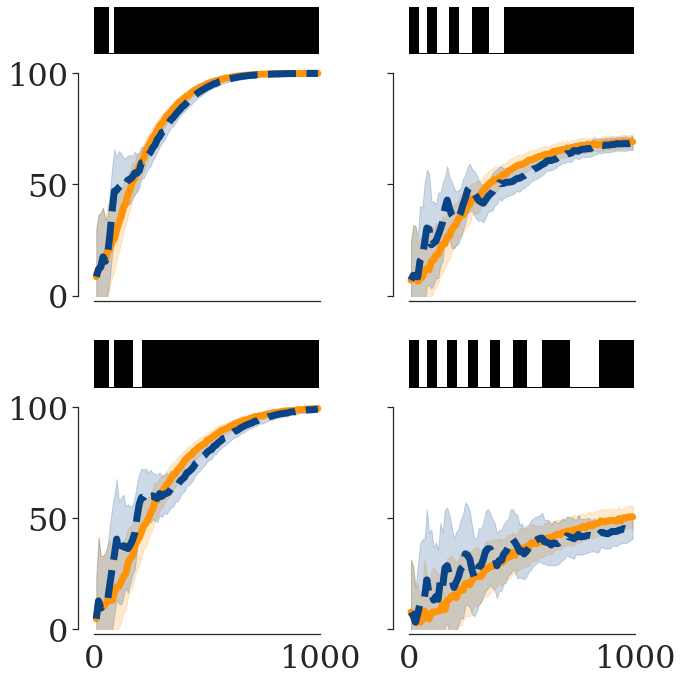

In [65]:
rFrac = 0.01

f,axList = plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,10))
tmpList2 = []
for i,(cost,turnover) in enumerate(product(costList,turnoverList)):
    currOutDir = os.path.join(dataDir,"turnover%1.2f/cost%1.2f"%(turnover,cost))
    # Read the data
    tmpList = []
    for replicateId in range(nReplicates):
        for txName in ["MTD","AT50"]:
            currDfName = os.path.join(currOutDir,"%s_cellCounts_cost_%1.1f_rFrac_%.2g_initSize_%.2g_dt_1.0_RepId_%d.csv"%(txName,cost*100,rFrac,initialSize,replicateId))
            tmpDf = pd.read_csv(currDfName)
            tmpDf['TreatmentBranch'] = txName
            tmpDf['ReplicateId'] = replicateId
            tmpDf = tmpDf[::10]
            tmpList.append(tmpDf)
    dataDf = pd.concat(tmpList)
    dataDf['PropFailedDivs'] = dataDf.NFailedDivs/dataDf.NAttemptedDivs*100
    dataDf = dataDf[dataDf.Time<1e3]
    diffVec = dataDf.PropFailedDivs[dataDf.TreatmentBranch=="AT50"]-dataDf.PropFailedDivs[dataDf.TreatmentBranch=="MTD"]
    diffVec = diffVec[np.isnan(diffVec)==False]
    print(turnover,np.linalg.norm(diffVec,ord=1),np.sum(diffVec),np.mean(diffVec))
    dataDf['Turnover'] = turnover
    tmpList2.append(dataDf)
    PlotCompetitionOverTime(dataDf,ylim=130,errStyle='sd',
                            ax=axList.flatten()[i])
plt.tight_layout()
plt.savefig("figures/competition_effectTurnoverCost.pdf")
# dataDf_all = pd.concat(tmpList2)
# dataDf_all.to_csv("./data/figure3d.csv")

## f) Per-capita Growth Rate

0 34.61915494378291 -0.2937428986808105 -1.174971594723242e-05
0.3 103.88142077485175 -1.5521793573877458 -6.208717429550983e-05


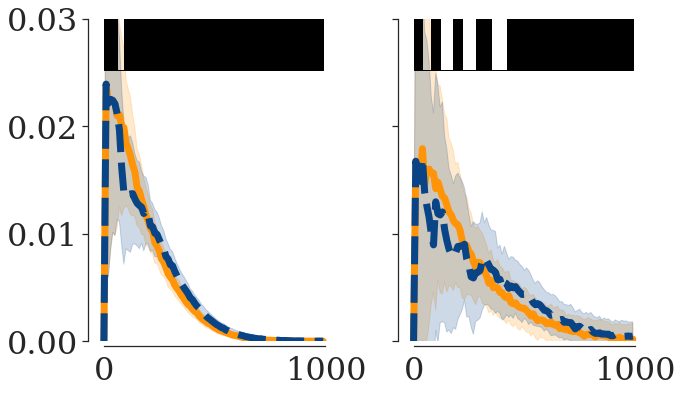

In [66]:
rFrac = 0.01
cost = 0.
f,axList = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,6))
for i,turnover in enumerate(turnoverList):
    currOutDir = os.path.join(dataDir,"turnover%1.2f/cost%1.2f"%(turnover,cost))
    # Read the data
    tmpList = []
    for replicateId in range(nReplicates):
        for txName in ["MTD","AT50"]:
            currDfName = os.path.join(currOutDir,"%s_cellCounts_cost_%1.1f_rFrac_%.2g_initSize_%.2g_dt_1.0_RepId_%d.csv"%(txName,cost*100,rFrac,initialSize,replicateId))
            tmpDf = pd.read_csv(currDfName)
            tmpDf['TreatmentBranch'] = txName
            tmpDf['ReplicateId'] = replicateId
            tmpDf = tmpDf[::10]
            tmpDf['PerCapitaGrowthRate'] = ((tmpDf.NAttemptedDivs-tmpDf.NFailedDivs)-tmpDf.NDeaths)/tmpDf.NCells_R
            tmpList.append(tmpDf)
    dataDf = pd.concat(tmpList)
    dataDf = dataDf[dataDf.Time<1e3]
    diffVec = dataDf.PerCapitaGrowthRate[dataDf.TreatmentBranch=="AT50"]-dataDf.PerCapitaGrowthRate[dataDf.TreatmentBranch=="MTD"]
    diffVec = diffVec[np.isnan(diffVec)==False]
    print(turnover,np.linalg.norm(diffVec,ord=1),np.sum(diffVec),np.mean(diffVec))
#     dataDf.to_csv("data/figure3_f_%d.csv"%i)
    PlotCompetitionOverTime(dataDf,competitionMetric="PerCapitaGrowthRate",errStyle='sd',ylim=0.03,ax=axList[i])
plt.tight_layout()
plt.savefig("figures/competition_perCapitaGR_turnoverCost.pdf")